#Exercise 1: Setting up the environment

Install Required Library

In [ ]:
!pip install pgmpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 8.8 MB/s eta 0:00:00


Import Libraries

In [ ]:
import numpy as np
import pandas as pd
from pgmpy.models import BayesianNetwork
from pgmpy.inference import VariableElimination
from pgmpy.inference import BeliefPropagation
from pgmpy.factors.discrete import TabularCPD

#Exercise 2: Building a Simple Bayesian Network

Define the Structure

In [ ]:
#Define the structure of the Bayesian Network
model = BayesianNetwork([('Weather', 'Traffic'), ('Traffic', 'Late')])

Define Conditional Probability Tables (CPTs)

In [ ]:
#Weather CPD
cpd_weather = TabularCPD(variable='Weather', variable_card=2, values=[[0.8], [0.2]])

#Traffic CPD given Weather
cpd_traffic_given_weather = TabularCPD(variable='Traffic', variable_card=2, values=[[0.9, 0.5], [0.1, 0.5]], evidence=['Weather'], evidence_card=[2])

#Late CPD given Traffic
cpd_late = TabularCPD(variable='Late', variable_card=2, values=[[0.95, 0.4], [0.05, 0.6]], evidence=['Traffic'], evidence_card=[2])

#Add CPDs to the model
model.add_cpds(cpd_weather, cpd_traffic_given_weather, cpd_late)

#Check if the model is valid
assert model.check_model()

#Exercise 3: Querying the Bayesian Network

In [ ]:
#Create an inference object
inference = VariableElimination(model)

#Query the probability of being Late given that Weather is Rainy
result = inference.query(variables=['Late'], evidence={'Weather': 1}) #1 corresponds
print(result)

+---------+-------------+
| Late    |   phi(Late) |
+=========+=============+
| Late(0) |      0.6750 |
+---------+-------------+
| Late(1) |      0.3250 |
+---------+-------------+


#Exercise 4: Parameter Learning

Simulate a Dataset

In [ ]:
#Create a synthetic dataset
#0 for Sunny, 1 for Rainy
data = pd.DataFrame({'Weather': np.random.choice([0, 1], size=1000, p=[0.8, 0.2]), 'Traffic': np.nan, 'Late': np.nan})

#Fill Traffic based on Weather
data.loc[data['Weather'] == 0, 'Traffic'] = np.random.choice([0, 1], size=data[data['Weather']==0].shape[0], p=[0.9, 0.1])
data.loc[data['Weather'] == 1, 'Traffic'] = np.random.choice([0, 1], size=data[data['Weather']==1].shape[0], p=[0.5, 0.5])

#Fill Late based on Traffic
data['Late']= np.where(data['Traffic']==0, np.random.choice([0, 1], size=data.shape[0], p=[0.95, 0.05]), np.random.choice([0, 1], size=data.shape[0], p=[0.4, 0.6]))

Estimate the Parameters

In [ ]:
from pgmpy.estimators import MaximumLikelihoodEstimator

#Create a Bayesian Model
model = BayesianNetwork([('Weather', 'Traffic'), ('Traffic', 'Late')])

#Fit the model to the data using Maximum Likelihood Estimation
model.fit(data, estimator=MaximumLikelihoodEstimator)

#Check the estimated CPDs
for cpd in model.get_cpds():
    print(cpd)

+------------+-------+
| Weather(0) | 0.808 |
+------------+-------+
| Weather(1) | 0.192 |
+------------+-------+
+--------------+---------------------+--------------------+
| Weather      | Weather(0)          | Weather(1)         |
+--------------+---------------------+--------------------+
| Traffic(0.0) | 0.9071782178217822  | 0.5208333333333334 |
+--------------+---------------------+--------------------+
| Traffic(1.0) | 0.09282178217821782 | 0.4791666666666667 |
+--------------+---------------------+--------------------+
+---------+---------------------+---------------------+
| Traffic | Traffic(0.0)        | Traffic(1.0)        |
+---------+---------------------+---------------------+
| Late(0) | 0.9567827130852341  | 0.38922155688622756 |
+---------+---------------------+---------------------+
| Late(1) | 0.04321728691476591 | 0.6107784431137725  |
+---------+---------------------+---------------------+


#Exercise 5: Visualizing the Bayesian Network

Visualize the Network Structure

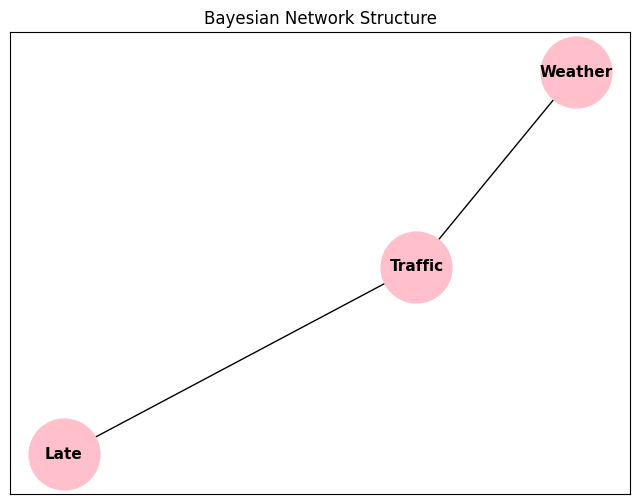

In [19]:
import matplotlib.pyplot as plt
import networkx as nx

# Assuming 'model' is defined and has a method 'to_networkx'
# Convert the Bayesian Model to a NetworkX graph
nx_graph = nx.DiGraph(model.edges())

# Draw the graph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(nx_graph)

# Draw nodes
nx.draw_networkx_nodes(nx_graph, pos, node_color='pink', node_size=2600)

# Draw labels
labels = {node: node for node in nx_graph.nodes()}  # Create a dictionary for node labels
nx.draw_networkx_labels(nx_graph, pos, labels=labels, font_size=11, font_color='black', font_weight='bold')

# Draw edges
nx.draw_networkx_edges(nx_graph, pos, arrows=True)

plt.title('Bayesian Network Structure')
plt.show()